# Create a marketing campaign from a product sketch




## Setup

In [1]:
!pip install -q "google-generativeai>=0.7.2"

In [2]:
from google.colab import userdata
import google.generativeai as genai
import PIL.Image
from IPython.display import display, Image, HTML
import ipywidgets as widgets

import json
from typing_extensions import TypedDict

To run the following cell, your API key must be stored it in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key, or you're not sure how to create a Colab Secret, see the [Authentication](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Authentication.ipynb) quickstart for an example.

In [3]:
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

## Marketing Campaign
- Product Name
- Description
- Feature List / Descriptions
- H1
- H2


In [4]:
model = genai.GenerativeModel(model_name='gemini-1.5-flash')

## Analyze Product Sketch

First you will download a sample image to be used:

In [5]:
productSketchUrl = "https://storage.googleapis.com/generativeai-downloads/images/jetpack.jpg"
!curl -o jetpack.jpg {productSketchUrl}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  349k  100  349k    0     0  2145k      0 --:--:-- --:--:-- --:--:-- 2155k


You can view the sample image to understand the prompts you are going to work with:

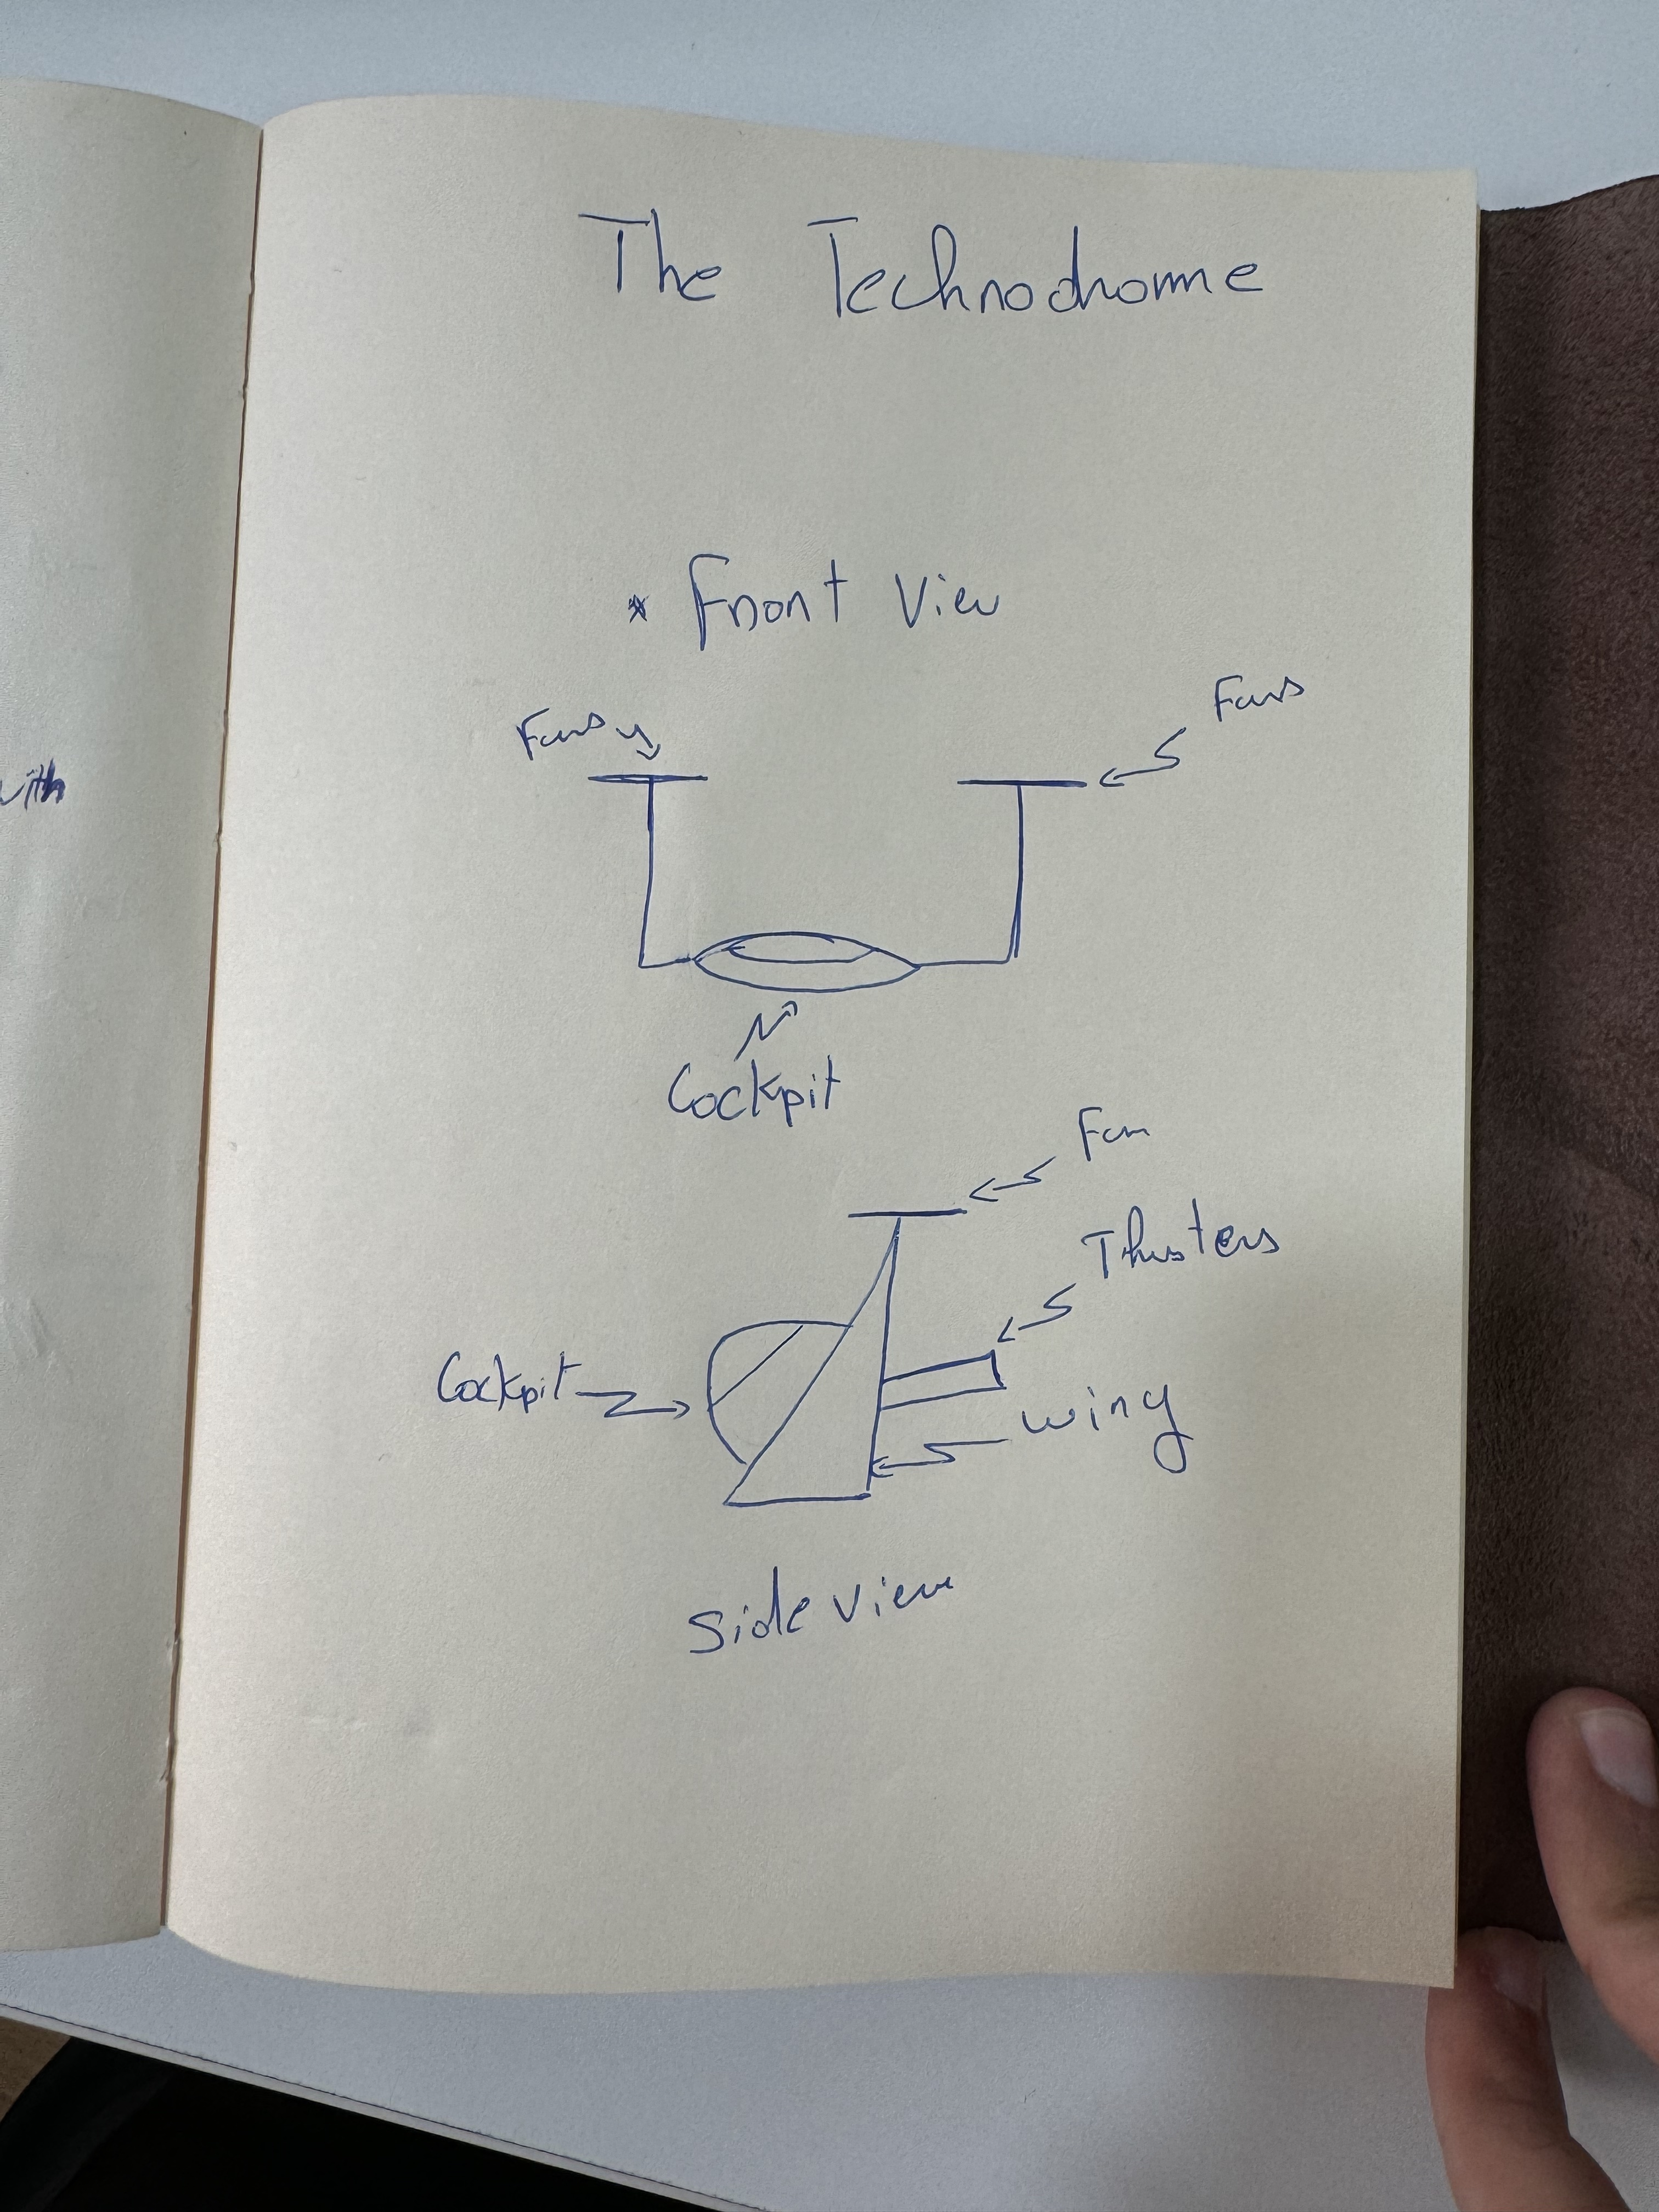

In [59]:
img = PIL.Image.open('Technodrome.jpg')
display(Image('Technodrome.jpg', width=300))

Now define a prompt to analyze the sample image:

In [62]:
analyzePrompt = """This image contains a sketch of a potential product along with some notes.
Given the product sketch, describe the product as thoroughly as possible based on what you
see in the image, making sure to note all of the product features.

Format your response using this Markdown structure:

# Product Analysis

## Overview
[Provide a brief overview of the product]

## Key Features
* [Feature 1]
* [Feature 2]
* [Feature 3]

## Technical Specifications
* [Spec 1]
* [Spec 2]

## Design Notes
* [Design detail 1]
* [Design detail 2]

## Additional Observations
[Any other relevant details]"""

- Set the model to return JSON by setting `response_mime_type="application/json"`.
- Describe the schema for the response using a `TypedDict`.

In [63]:
class Response(TypedDict):
  description: str
  features: list[str]

In [64]:
response = model.generate_content(
    [analyzePrompt, img],
    generation_config=genai.GenerationConfig(
        response_mime_type="text/plain"))

response_2= model.generate_content(
    [analyzePrompt, img],                         # Input data
    generation_config=genai.GenerationConfig(     # Configuration settings
        response_mime_type="application/json",    # Specify JSON output
        response_schema=Response))

In [65]:
productInfo = json.loads(response_2.text)

print(json.dumps(productInfo, indent=4))

{
    "description": "The Technodome is a futuristic, possibly space-faring vehicle with a distinctive design. Its key features include two fans for forward thrust, a cockpit with a large, single circular window, and a wing for additional maneuverability.",
    "features": [
        "two fans for forward thrust",
        "cockpit with a large, single circular window",
        "a wing for additional maneuverability",
        "thrusters"
    ]
}


In [66]:
from IPython.display import Markdown
display(Markdown(response.text))

# Product Analysis

## Overview
The sketch depicts a concept for a flying vehicle, referred to as "The Technodome".  The design suggests a futuristic, possibly personal, aerial vehicle. 

## Key Features
* **Cockpit:**  The vehicle features a cockpit, likely for one or two occupants.
* **Fans:** The vehicle appears to have fans on the top and sides for vertical lift and maneuverability.
* **Thrusters:** The image shows thrusters on the rear of the vehicle, likely for forward propulsion.
* **Wing:** The side view suggests a wing-like structure, potentially providing lift and stability during flight.

## Technical Specifications
* **Size:** No specific size details are provided in the sketch.
* **Materials:** The sketch doesn't specify materials used in construction.

## Design Notes
* **Aerodynamics:** The design appears to prioritize aerodynamic efficiency with streamlined shapes and potential use of lift-generating wings.
* **Vertical Takeoff and Landing (VTOL):** The use of fans suggests the capability for vertical takeoff and landing.

## Additional Observations
* **"The Technodome"** is a descriptive name that evokes a futuristic and possibly technological theme.
* **Handwritten Notes:** The sketch is accompanied by handwritten notes, indicating an early stage of product design or brainstorming. 
* **Simple Sketch:** The sketch is simple and lacks detailed specifications, suggesting a conceptual rather than a finalized design.

> Note: Here the model is just following text instructions for how the output json should be formatted. The API also supports a **strict JSON mode** where you specify a schema, and the API uses "Controlled Generation" (aka "Constrained Decoding") to ensure the model follows the schema, see the [JSON mode quickstart](https://github.com/google-gemini/cookbook/blob/main/quickstarts/JSON_mode.ipynb) for details.

## Generate marketing ideas

Now using the image you can use Gemini API to generate marketing names ideas:

In [67]:
# First, modify the prompt to request Markdown formatting
namePrompt = """You are a marketing whiz and writer trying to come up with a name for the
product shown in the image. Create a marketing campaign analysis with the following:

1. Generate ten varied, interesting possible names
2. For each name, provide a brief explanation of why it works
3. Include suggested taglines for the top 3 names
4. Add marketing channel recommendations

Format your response in Markdown."""

# Modify the generate_content call to use text/plain
response = model.generate_content(
    [namePrompt, img],
    generation_config=genai.GenerationConfig(
        response_mime_type="text/plain"))  # Changed from application/json

# Display the markdown response
from IPython.display import Markdown
display(Markdown(response.text))

# If you still want to have a dropdown for name selection,
# you'll need to parse the names from the markdown text.
# Here's one way to do it:
import re

# Extract names from the markdown text (assuming they're marked with bullet points)
names = re.findall(r'\* "(.*?)"', response.text)

if names:
    dropdown = widgets.Dropdown(
        options=names,
        value=names[0],  # default value
        description='Select Name:',
        disabled=False,
    )
    display(dropdown)

##  Technodome Product Naming and Marketing Campaign Analysis 

Based on the image, it appears to be a design concept for a futuristic, possibly personal, transportation device.  Here is a breakdown of potential product names, taglines, and marketing recommendations.

**1. Product Names**

1. **Aerofly:**  Combines "aero" (relating to air) and "fly," suggesting a futuristic, smooth flight experience.
2. **SkyRunner:**  Evokes a sense of speed and agility, implying effortless movement through the air.
3. **Zenith:**  A powerful name symbolizing the peak of technological achievement, signifying ultimate mobility.
4. **Nova:**  Conjures images of bright, new beginnings, implying a revolutionary transportation solution.
5. **Elevate:**  Highlights the product's ability to elevate the user above the mundane, offering a unique perspective.
6. **Zephyr:**  A subtle, poetic name evoking a gentle breeze, suggesting a smooth, silent ride.
7. **Aerion:**  Inspired by the name "Ariel," it implies a connection to the air, light, and agility.
8. **Quicksilver:**  Relates to the speed of mercury, emphasizing the swiftness and ease of travel.
9. **Quantum:**  A futuristic, high-tech name suggesting advanced technology and possibilities.
10. **The Navigator:**  A straightforward name that positions the product as a tool for exploring and navigating the world.

**2. Name Explanations**

* **Aerofly:**  Simple, memorable, and clearly conveys the product's function.
* **SkyRunner:**  Action-oriented and suggests both speed and control.
* **Zenith:**  Aspirational, premium-sounding, and implies leading-edge technology.
* **Nova:**  Exciting, suggestive of a new era in transportation.
* **Elevate:**  Emphasizes the unique experience and the product's ability to improve mobility.
* **Zephyr:**  Quiet, elegant, and conveys a smooth, luxurious experience.
* **Aerion:**  Suggests a connection to the air and a sense of lightness and freedom.
* **Quicksilver:**  Evokes speed and agility, suggesting a dynamic and exciting ride.
* **Quantum:**  High-tech and futuristic, hinting at revolutionary potential.
* **The Navigator:**  Simple and straightforward, focuses on the product's functionality.

**3. Top 3 Names and Taglines**

**Aerofly:**

* **Tagline 1:**  "Aerofly:  Where Freedom Takes Flight."
* **Tagline 2:**  "Aerofly:  The Future of Personal Flight."
* **Tagline 3:**  "Aerofly:  Experience the Air Like Never Before."

**SkyRunner:**

* **Tagline 1:**  "SkyRunner:  The Ultimate in Air Mobility."
* **Tagline 2:**  "SkyRunner:  Take Off and Run the Skies."
* **Tagline 3:**  "SkyRunner:  Agility. Speed. Freedom."

**Zenith:**

* **Tagline 1:**  "Zenith:  The Pinnacle of Personal Transportation."
* **Tagline 2:**  "Zenith:  Elevate Your Journey."
* **Tagline 3:**  "Zenith:  Experience the Future of Mobility."

**4. Marketing Channel Recommendations**

* **Digital Marketing:**  Target specific audiences with online ads on platforms like YouTube, Facebook, and Instagram. Create engaging videos showcasing the product's capabilities and its benefits.
* **Social Media:**  Build a strong social media presence, using compelling visuals and user-generated content to create a sense of excitement. Host online contests and giveaways to increase engagement.
* **Influencer Marketing:**  Partner with tech and lifestyle influencers to reach a wider audience and generate buzz about the product.
* **Events and Trade Shows:**  Showcase the product at major technology and transportation events to generate excitement and attract potential investors.
* **Partnerships:**  Collaborate with related industries, such as travel and tourism, to offer unique experiences and promotions.
* **Public Relations:**  Generate media coverage through press releases, articles, and interviews to raise awareness and build credibility.

**Overall, the chosen name and marketing strategy should reflect the product's unique features and target audience.  The goal is to create a strong brand identity that captures the imagination and excites potential customers.** 


Finally you can work on generating a page for your product campaign:

In [68]:
namePrompt = """You are a marketing whiz and writer trying to come up with a name for the
product shown in the image. Come up with ten varied, interesting possible names."""

response_2 = model.generate_content(
    [namePrompt, img],
    generation_config=genai.GenerationConfig(
        response_mime_type="application/json",
        response_schema=list[str]))

# Parse the JSON response
names = json.loads(response_2.text)

# Create a Dropdown widget
dropdown = widgets.Dropdown(
    options=names,
    value=names[0],  # default value
    description='Name:',
    disabled=False,
    layout={'width': 'max-content'}  # Makes dropdown wide enough to show names
)

# Display the original JSON data in a formatted way
print("All suggested names:")
print(json.dumps(names, indent=4))

print("\nSelect a name from the dropdown:")
display(dropdown)

# Optionally, add an observer to react to selections
def on_change(change):
    if change['type'] == 'value' and change['new']:
        print(f"\nYou selected: {change['new']}")

dropdown.observe(on_change, names='value')

All suggested names:
[
    "Technodome",
    "Technocraft",
    "Aero-Glide",
    "SkyDrive",
    "AirVoyager",
    "Zenith",
    "StratoSphere",
    "Quantum Flyer",
    "Aerodynamicus",
    "Apex"
]

Select a name from the dropdown:


Dropdown(description='Name:', layout=Layout(width='max-content'), options=('Technodome', 'Technocraft', 'Aero-…

In [75]:
name = dropdown.value

In [76]:
websiteCopyPrompt = f"""You're a marketing whiz and expert copywriter. You're writing
website copy for a product named {name}. Your first job is to come up with H1
H2 copy. These are brief, pithy sentences or phrases that are the first and second
things the customer sees when they land on the splash page. Here are some examples:
[{{
  "h1": "A feeling is canned",
  "h2": "drinks and powders to help you feel calm cool and collected\
   despite the stressful world around you"
}},
{{
  "h1": "Design. Publish. Done.",
  "h2": "Stop rebuilding your designs from scratch. In Framer, everything\
   you put on the canvas is ready to be published to the web."
}}]

Create the same json output for a product named "{name}" with description\
 "{productInfo['description']}".
Output ten different options as json in an array.
"""

In [77]:
websiteCopyPrompt = f"""You're a marketing whiz and expert copywriter. You're writing
website copy for a product named {name}. Your job is to come up with compelling H1 (main headline)
and H2 (subheadline) copy. These are brief, pithy sentences or phrases that are the first and second
things the customer sees when they land on the splash page.

Here are some examples for reference:
# A feeling is canned
## drinks and powders to help you feel calm cool and collected despite the stressful world around you

# Design. Publish. Done.
## Stop rebuilding your designs from scratch. In Framer, everything you put on the canvas is ready to be published to the web.

Create ten different headline combinations for a product named "{name}" with description "{productInfo['description']}".
Format your response in Markdown with each option numbered and separated by horizontal lines.
"""

response_3 = model.generate_content(
    [websiteCopyPrompt],
    generation_config=genai.GenerationConfig(
        response_mime_type="text/plain"))  # Changed to text/plain

# Display the markdown
from IPython.display import Markdown
display(Markdown(response_3.text))

## Zenith Headline & Subheadline Options:

1. ### **Zenith: The Future of Flight**
   ## Experience the thrill of interstellar travel in a vehicle built for both performance and style.

---

2. ### **Zenith: Where Innovation Takes Flight**
   ## A futuristic Technodome with unparalleled design and cutting-edge technology.

---

3. ### **Zenith:  The Technodome**
   ## A single-seat, space-faring vehicle designed for speed, agility, and awe-inspiring views. 

---

4. ### **Zenith:  Beyond the Horizon**
   ##  Embrace the future of travel with a vehicle that combines performance, design, and possibility.

---

5. ### **Zenith:  Rise Above the Ordinary**
   ##  A technological marvel, the Technodome pushes the boundaries of what a vehicle can be.

---

6. ### **Zenith:  The Ultimate Ride**
   ##  Experience the thrill of flight in a vehicle that combines futuristic design and advanced technology.

---

7. ### **Zenith:  A Window to the Future**
   ##  Gaze upon the universe from the cockpit of a sleek, innovative Technodome. 

---

8. ### **Zenith:  Where Speed Meets Style**
   ##  A vehicle as distinctive as its design, the Technodome is a technological marvel.

---

9. ### **Zenith:  The Next Generation of Flight**
   ##  The Technodome is more than just a vehicle; it's a symbol of innovation and progress.

---

10. ### **Zenith:  A Journey Beyond Imagination**
   ##  Experience the extraordinary with a vehicle that transcends the boundaries of conventional travel.


In [78]:
class Headings(TypedDict):
  h1:str
  h2:str

In [79]:
copyResponse = model.generate_content(
    [websiteCopyPrompt, img],
    generation_config=genai.GenerationConfig(
        response_mime_type="application/json",
        response_schema=list[Headings]))

In [80]:
copy = json.loads(copyResponse.text)

In [81]:
copy

[{'h1': 'Zenith: The Technodome',
  'h2': 'A futuristic vehicle ready to take you anywhere.'},
 {'h1': 'The Future is Here', 'h2': 'Introducing Zenith, the Technodome.'},
 {'h1': 'Experience the Zenith',
  'h2': 'A unique design with a circular window cockpit.'},
 {'h1': 'Zenith', 'h2': 'The Technodome:  Your Portal to Tomorrow.'},
 {'h1': 'Zenith: The Technodome',
  'h2': 'Forward-thrust fans and a wing for ultimate maneuverability.'},
 {'h1': 'Soar Through the Skies', 'h2': 'With Zenith, the Technodome.'},
 {'h1': 'The Technodome', 'h2': 'A sleek and futuristic vehicle.'},
 {'h1': 'Zenith: The Technodome',
  'h2': 'Built for adventure and exploration.'},
 {'h1': 'Zenith:  The Technodome',
  'h2': 'The future of transportation is here.'},
 {'h1': 'The Technodome Awaits', 'h2': 'Experience Zenith.'}]

In [82]:
h1 = copy[1]['h1']
h2 = copy[1]['h2']

In [91]:
htmlPrompt = f"""Generate HTML and CSS for a splash page for a new product called {name}.
Output only HTML and CSS and do not link to any external resources.
Include the top level title: "{h1}" with the subtitle: "{h2}".

Also add names to the product features that sound exciting, columns with the features underneath and a call to action

Further add a concept desing the page
Return the HTML directly, do not wrap it in triple-back-ticks (```).
"""

In [92]:
response = model.generate_content([htmlPrompt])
print(response.text)

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1.0">
<title>Zenith - The Technodome</title>
<style>
body {
  font-family: sans-serif;
  margin: 0;
  background-color: #f2f2f2;
  display: flex;
  flex-direction: column;
  align-items: center;
  justify-content: center;
  min-height: 100vh;
}

.container {
  background-color: #fff;
  padding: 50px;
  border-radius: 10px;
  box-shadow: 0 2px 5px rgba(0, 0, 0, 0.1);
  text-align: center;
}

h1 {
  font-size: 48px;
  margin-bottom: 20px;
}

h2 {
  font-size: 24px;
  margin-bottom: 30px;
}

.features {
  display: flex;
  justify-content: space-around;
  margin-bottom: 40px;
}

.feature {
  text-align: left;
}

.feature h3 {
  font-size: 20px;
  margin-bottom: 10px;
}

.feature p {
  line-height: 1.6;
}

.cta {
  display: inline-block;
  padding: 15px 30px;
  background-color: #007bff;
  color: #fff;
  border-radius: 5px;
  text-decoration: none;
  font-weight: b

In [93]:
HTML(response.text)